In [ ]:
import speech_recognition as sr

# Create a Recognizer instance
recognizer = sr.Recognizer()

# Capture audio input from the microphone
with sr.Microphone() as source:
   print("Speak something...")
   audio_data = recognizer.listen(source)

# Perform speech recognition using Google Web Speech API
try:
   text = recognizer.recognize_google(audio_data)
   print("You said:", text)
except sr.UnknownValueError:
   print("Sorry, could not understand audio.")
except sr.RequestError as e:
   print("Error: Could not request results from Google Speech Recognition service;")

Speak something...
You said: hi Dhiraj


Speak something...


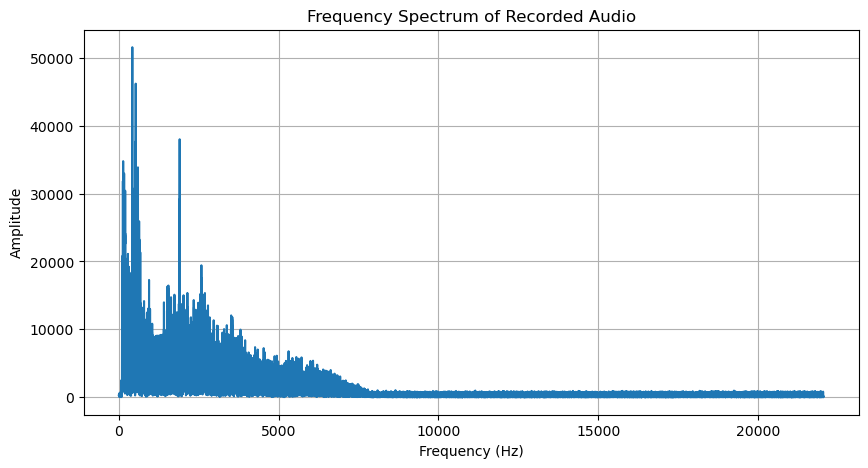

In [4]:
import speech_recognition as sr
import numpy as np
import matplotlib.pyplot as plt
import wave
import io

# Create a Recognizer instance
recognizer = sr.Recognizer()

# Capture audio input from the microphone
with sr.Microphone() as source:
    print("Speak something...")
    recognizer.adjust_for_ambient_noise(source)  # Adjust for background noise
    audio_data = recognizer.listen(source)

# Convert the audio data to raw PCM bytes
wav_bytes = audio_data.get_wav_data()

# Convert raw audio bytes into a NumPy array
with wave.open(io.BytesIO(wav_bytes), 'rb') as wav_file:
    sample_rate = wav_file.getframerate()  # Get sample rate
    audio_frames = wav_file.readframes(wav_file.getnframes())
    audio_array = np.frombuffer(audio_frames, dtype=np.int16)

# Perform Fast Fourier Transform (FFT)
fft_values = np.fft.fft(audio_array)
frequencies = np.fft.fftfreq(len(fft_values), d=1/sample_rate)  # Frequency axis

# Plot the frequency spectrum
plt.figure(figsize=(10, 5))
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_values[:len(fft_values)//2]))  # Only positive frequencies
plt.title("Frequency Spectrum of Recorded Audio")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


Speak something...
Sorry, could not understand the audio.


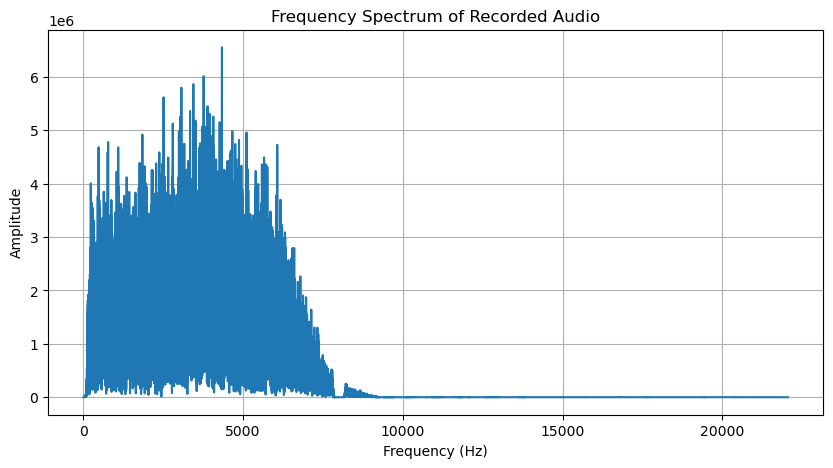

In [15]:
import speech_recognition as sr
import numpy as np
import matplotlib.pyplot as plt
import wave
import io

# Create a Recognizer instance
recognizer = sr.Recognizer()

# Capture audio input from the microphone
with sr.Microphone() as source:
    print("Speak something...")
    recognizer.adjust_for_ambient_noise(source)  # Reduce background noise
    audio_data = recognizer.listen(source)

# Perform speech recognition using Google Web Speech API
try:
    text = recognizer.recognize_google(audio_data)
    print("You said:", text)
except sr.UnknownValueError:
    print("Sorry, could not understand the audio.")
except sr.RequestError as e:
    print(f"Error: Could not request results from Google Speech Recognition service; {e}")

# Convert the audio data to raw PCM bytes
wav_bytes = audio_data.get_wav_data()

# Convert raw audio bytes into a NumPy array
with wave.open(io.BytesIO(wav_bytes), 'rb') as wav_file:
    sample_rate = wav_file.getframerate()  # Get sample rate
    audio_frames = wav_file.readframes(wav_file.getnframes())
    audio_array = np.frombuffer(audio_frames, dtype=np.int16)

# Perform Fast Fourier Transform (FFT)
fft_values = np.fft.fft(audio_array)
frequencies = np.fft.fftfreq(len(fft_values), d=1/sample_rate)  # Frequency axis

# Plot the frequency spectrum
plt.figure(figsize=(10, 5))
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_values[:len(fft_values)//2]),'-')  # Only positive frequencies
plt.title("Frequency Spectrum of Recorded Audio")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()
